# Feature Engineering Notebook

Clean and extract features from raw data

# Steps

1. Split the data into training and test data set
1. Clean the data (transform null values)
1. Scale necessary attributes (normalization, standardization)
1. Save transformed data for model training


# Import packages

In [4]:
# load data
import matplotlib.pyplot

# Add directory above current directory to path
import sys; sys.path.insert(0, '..')
#from submodules.load_data import load_data

# data manipulation
import pandas as pd

# data splitting
from sklearn.model_selection import train_test_split

# data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# k-fold cross validation
from sklearn.model_selection import cross_validate

# serializing, compressing, and loading the models
import joblib
from tabulate import tabulate
# performance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# displaying plots
from IPython import display
import matplotlib.image as mpimg
import glob
from skimage.util import montage
import numpy as np
import os
import shutil

# Model Selection

In this notebook, we show how to train a random forest classifier. If you are interested in model selection, i.e, training different kinds of models and comparing them to pick the best one, please refer to a more detailed nte

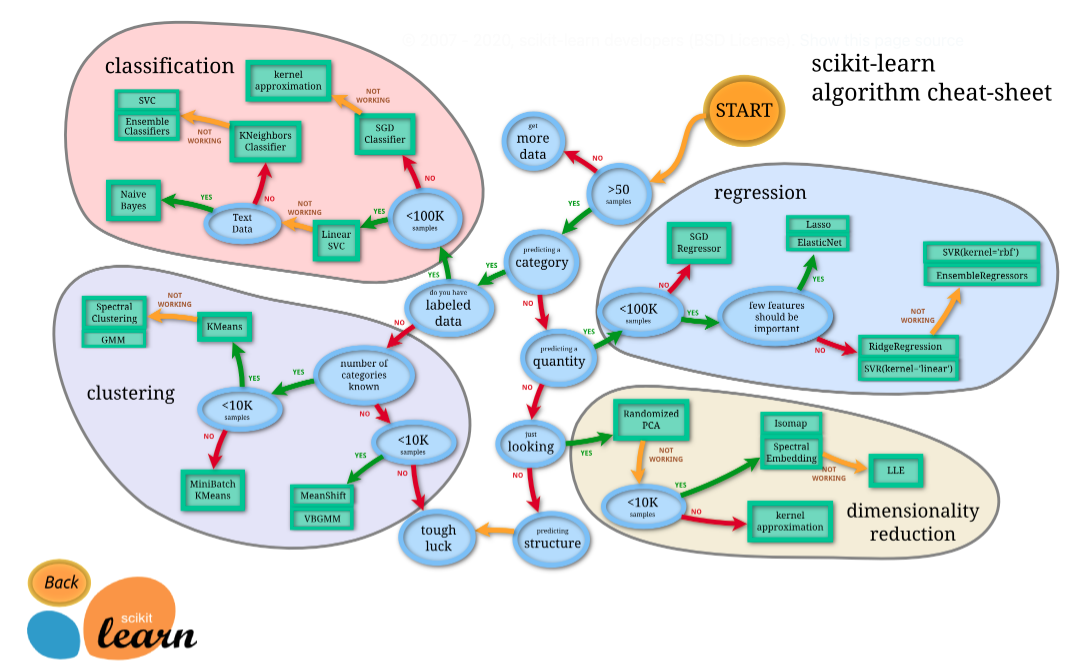

In [5]:
display.Image('../images/scikitlearn-choose-right-estimator.png')

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Classifier Comparison

[Classification Model Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html?highlight=svm%20svc)

1. [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
1. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
1. [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

### Model Evaluation
https://scikit-learn.org/stable/modules/model_evaluation.html

In this notebook, we use the following APIs to evaluate the quality of a model’s predictions. For more detailed evaluation and other metrics, please refer to the link above

1. Estimator score method (Score)
2. Scoring parameter (Cross validation)
3. Metric functions (F1 score from Classification metrics)

Best practice to save every model you experiment with so you can come back easily to any model.
Save both the hyperparameters and trained parameter, as well as the cross-validation scores and predictions.
This will allow you to easily compare scores across model types. Use Pickle or joblib libraries.

## Load training and test data


In [7]:
import configparser

settings = configparser.ConfigParser()
settings._interpolation = configparser.ExtendedInterpolation()
settings.read('../config')
settings.sections()

#path to data folder
version = settings.get('Run', 'version')

#Prepare data directory for current run
data_path = "../" + settings.get('Path', 'data') + "run_" + version
transform_path = data_path + "/transform/"
model_path = "../" + settings.get('Path', 'models') + "run_" + version

if not os.path.exists(model_path):
    os.makedirs(model_path)
    os.makedirs(model_path+"/experiment")
else:
    shutil.rmtree(model_path)           # Removes all the subdirectories!
    os.makedirs(model_path)
    os.makedirs(model_path+"/experiment")

with open(transform_path + "X_train_prepared.csv") as file_name:
    X_train_prepared = np.loadtxt(file_name, delimiter=",")

with open(transform_path + "X_train_prepared_m.csv") as file_name:
    X_train_prepared_m = np.loadtxt(file_name, delimiter=",")
    
with open(transform_path + "y_train.csv") as file_name:
    y_train = np.loadtxt(file_name, delimiter=",")
    
with open(transform_path + "y_test.csv") as file_name:
    y_test = np.loadtxt(file_name, delimiter=",")




## Initialize results and define method to evaluate models


In [8]:
# Initialize rows and columns of table to store results

results = [["Support Vector Classifier"], 
          ["Random Forest Classifier"], 
          ["Logistic Regression"]]
  
#define header names
col_names = ["Estimator score method", "Scoring parameter", "Metric functions"]


In [9]:
def eval_model(model):

    # ESTIMATOR SCORE METHOD

    accuracy = model.score(X_train_prepared,y_train)

    # SCORING PARAMETER
    cross_validation = cross_val_score(model, X_train_prepared, y_train, cv=3, scoring='recall_macro')

    # METRIC FUNCTIONS

    y_pred = model.predict(X_train_prepared)
    f1score = f1_score(y_train, y_pred)

    print ('Accuracy:' + str(accuracy) +'\nCross validation score: ' + str(cross_validation) + '\nf1 score: ' + str (f1score))

    var = [accuracy, cross_validation, f1score]
    return var

## Support Vector Classifier (SVC)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

### Model Training

In [10]:
# select the SVM
clf = svm.SVC()

# fit the model to the data
CLF = clf.fit(X_train_prepared, y_train)


### Model Evaluation

In [11]:
result0 = eval_model(CLF)
for item in result0:
    results[0].append(item)

Accuracy:0.9512195121951219
Cross validation score: [0.76258591 0.70292208 0.73262776]
f1 score: 0.6953125


### Store Model

In [13]:
# save and compress the model

joblib.dump(CLF, model_path+"/experiment/svc_model.pkl", compress=('bz2', 3))

['../models/run_0/experiment/svc_model.pkl']

## Random Forest Classifier

### Model Training

In [14]:
# select the estimator
CLF = RandomForestClassifier()

# fit the model to the data
CLF.fit(X_train_prepared, y_train)

RandomForestClassifier()

### Model Evaluation

In [15]:
result1 = eval_model(CLF)
for item in result1:
    results[1].append(item)

Accuracy:1.0
Cross validation score: [0.7542311  0.74580452 0.80199022]
f1 score: 1.0


### Store Model

In [16]:
# save the model
joblib.dump(CLF, model_path+"/experiment/rfc_model.pkl", compress=('bz2', 3))


['../models/run_0/experiment/rfc_model.pkl']

## Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

### Model Training

In [17]:
# select the classifier
CLF = LogisticRegression()

# fit the model to the data
CLF.fit(X_train_prepared, y_train)

LogisticRegression()

### Model Evaluation

In [18]:
result2 = eval_model(CLF)
for item in result2:
    results[2].append(item)

Accuracy:0.9455909943714822
Cross validation score: [0.7584622  0.76104739 0.78158205]
f1 score: 0.6561264822134388


### Store Model

In [19]:
# save the model
joblib.dump(CLF, model_path+"/experiment/log_model.pkl", compress=('bz2', 3))

['../models/run_0/experiment/log_model.pkl']

# Model Selection

In [20]:
#display table
print(tabulate(results, headers=col_names))


                             Estimator score method  Scoring parameter                     Metric functions
-------------------------  ------------------------  ----------------------------------  ------------------
Support Vector Classifier                  0.95122   [0.76258591 0.70292208 0.73262776]            0.695312
Random Forest Classifier                   1         [0.7542311  0.74580452 0.80199022]            1
Logistic Regression                        0.945591  [0.7584622  0.76104739 0.78158205]            0.656126


In [22]:
fp = open(model_path+"/model_comparison.txt", "w")
fp.write(tabulate(results, headers=col_names))
fp.close()
